In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

In [26]:
#ack = np.load('11734_12800_gum_mag_cat.npz')
#ack = np.load('0_1377_gum_mag_cat.npz') # old xargs one
ack = np.load('0_11027_gum_mag_cat.npz')
stars = ack['result_cat'].copy()
ack.close()

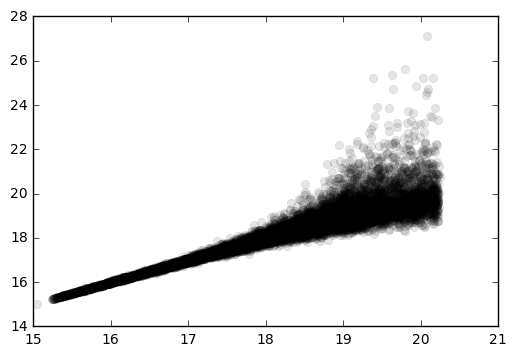

In [41]:
good = np.where(stars['g'] != 0)
plt.plot(stars['g_true'][good], stars['g'][good], 'ko', alpha=.1)

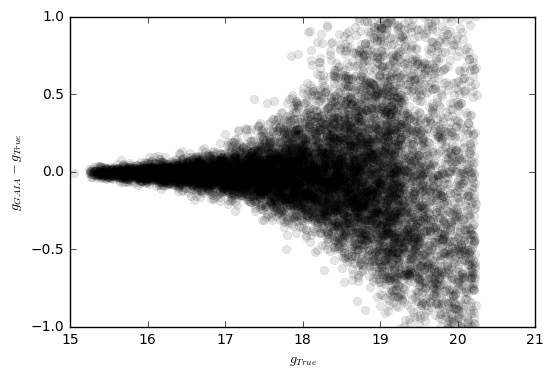

In [44]:
fn = 'g'
plt.plot(stars[fn+'_true'][good], stars[fn][good]-stars[fn+'_true'][good], 'ko', alpha=.1)
plt.ylim([-1,1])
plt.xlabel(r'$g_{True}$')
plt.ylabel(r'$g_{GAIA} - g_{True}$')

In [54]:
#good = np.where( (stars[fn+'_true'] > 16.8) & (stars[fn+'_true']< 17.2) & (stars[fn]>0))
good = np.where( (stars[fn+'_true'] > 17.8) & (stars[fn+'_true']< 18.2) & (stars[fn]>0))
resid = stars[fn][good]-stars[fn+'_true'][good]
print np.std(resid), good[0].size, np.std(resid)/((float(good[0].size)/189.)**.5)

0.201530269337 1104 0.0833847537793


In [30]:
stars['id'][np.where((stars['g_true'] < 16) & (stars['g'] > 19))]
np.where((stars['g_true'] < 16) & (stars['g'] > 19))

(array([], dtype=int64),)

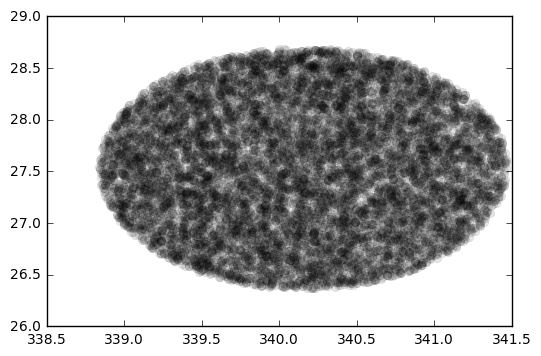

In [33]:
plt.plot(stars['raj2000'], stars['dej2000'], 'ko', alpha=.1)

In [36]:
from lsst.sims.utils import angularSeparation
ra_pole = np.median(stars['raj2000'])
dec_pole = np.median(stars['dej2000'])
dist_to_center = angularSeparation(ra_pole, dec_pole, stars['raj2000'], stars['dej2000'])

In [38]:
dist_to_center.max()

1.1823686412541508

In [7]:
from gaia_spec import gen_gums_mag_cat

In [8]:
iid = 58 #11733
star, sed, observed_sed = gen_gums_mag_cat(istart=iid, nstars=2, workdir='ack', save=False)

clipped 1225889 entries
using 274162 stars from GAIA

Opening cache of LSST SEDs in:
/Users/yoachim/gitRepos/sims_photutils/cacheDir/lsst_sed_cache.p


/Users/yoachim/gitRepos/sims_photutils/python/lsst/sims/photUtils/Sed.py:800: UserWarning: There is an area of non-overlap between desired wavelength range (306.64 to 1238.64) and sed FromArray (581.50 to 1238)
  % (wavelen_grid.min(), wavelen_grid.max(), self.name, wavelen.min(), wavelen.max()))
gaia_spec.py:174: RuntimeWarning: invalid value encountered in divide
  flambda = (red_sed.flambda*red_weight + blue_sed.flambda*blue_weight) / (red_weight + blue_weight)
/Users/yoachim/gitRepos/sims_photutils/python/lsst/sims/photUtils/Sed.py:800: UserWarning: There is an area of non-overlap between desired wavelength range (305.40 to 408.50) and sed FromArray (306.64 to 1239)
  % (wavelen_grid.min(), wavelen_grid.max(), self.name, wavelen.min(), wavelen.max()))


In [15]:
i=0
print star['id']
fn = ['u_truncated', 'g', 'r', 'i', 'z', 'y']
for filn in fn:
    print star[i][filn], star[i][filn+'_true']

[58 59]
17.9422311729 16.3185804901
17.9436539647 15.6843763079
16.903073585 15.3459291496
16.1783419129 15.2383147746
15.8946857155 15.204684332
15.4367686231 15.1889093987


In [16]:
i=58
print stars[i]['id']
for filn in fn:
    print stars[i][filn], stars[i][filn+'_true']

58
0.0 16.3185804901
19.6467554036 15.6843763079
17.4396752114 15.3459291496
17.4311267317 15.2383147746
17.1764108191 15.204684332
16.6552547013 15.1889093987


(300, 10000)

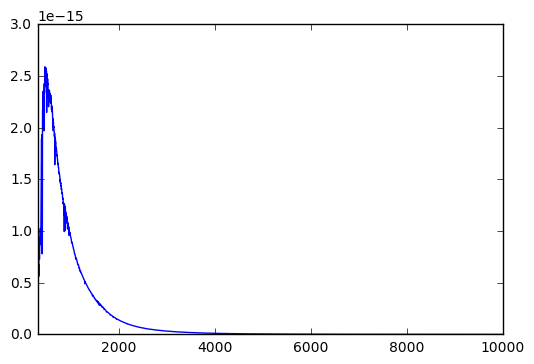

In [9]:
plt.plot(sed.wavelen, sed.flambda)
#plt.plot(observed_sed.wavelen, observed_sed.flambda)
plt.xlim([300,10000])

(300, 1000)

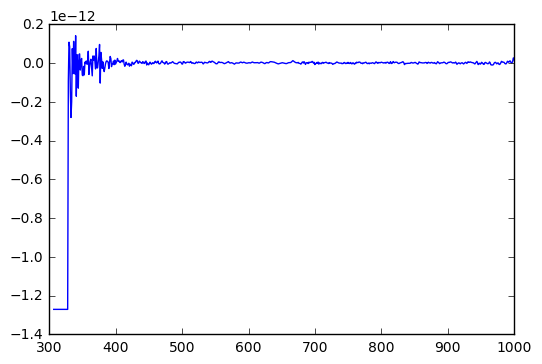

In [10]:
plt.plot(observed_sed.wavelen, observed_sed.flambda)
plt.xlim([300,1000])

In [11]:
from gaia_spec import SED2GAIA
gaia_observed = SED2GAIA(sed)

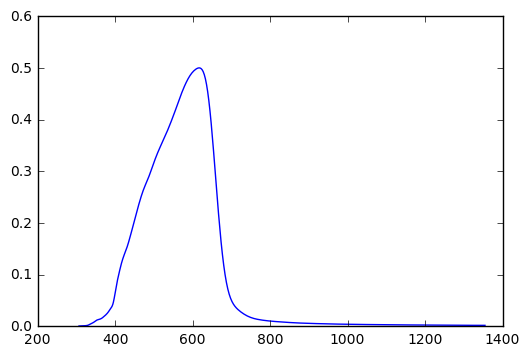

In [12]:
plt.plot(gaia_observed['BP_wave'], gaia_observed['noiseFreeSpec']['BPNoiseFreeSpec'])

In [13]:
gaia_observed.keys()

['noisySpec', 'noiseFreeSpec', 'BP_wave', 'RP_wave']